# Matrix Factorization with the Method of Least Squares

Let us assume that we have the ratings for 5 movies from you and your four other friends' Netflix accounts. Not all of you have watched all the movies and we would like to know what rating you will give to a movie that you haven't watched based on your friends' ratings, who have already watched it. 
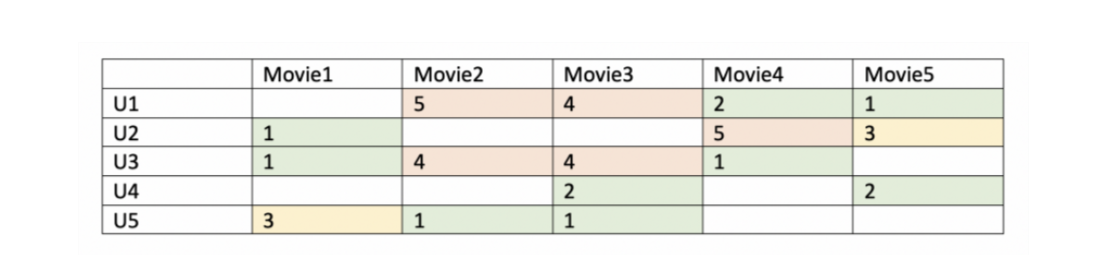

When we fill all the missing values in the table, this is called matrix completion. We have a training set of the ratings already present, we need to generate a prediction for the missing ratings in the table. The technique we will use to do so is called matrix factorization. 
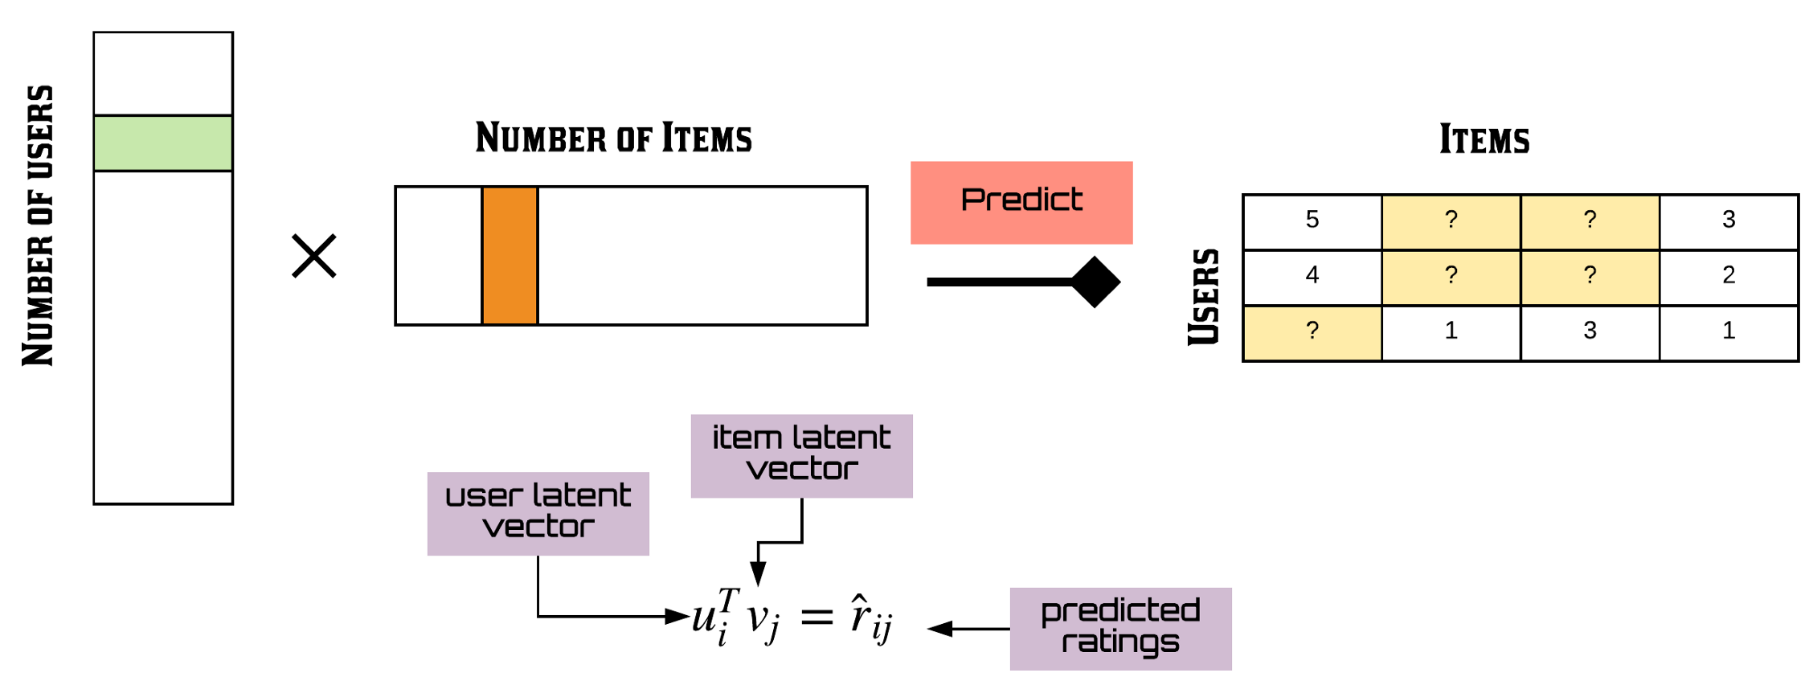

We can figure out the latent vectors in several ways. The simplest technique is minimizing the least-square error through graident-descent. The following code impliments gradient descent in the simplest way possible. 


In [1]:
import numpy

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:

            break

    return P, Q.T

Regularization is introduced in the least-square cost function. Beta and alpha are the hyperparamters of the problem which can be optimized further. Now, we will manually specify the R-matrix. You can change the ratings, the number of movies (columns), or the number of users (rows). The ratings which are not available to us, is specified as 0. The gradient descent algorithm will yield the optimum ratings.

The number of features K is also a hyperparameter in this problem. 

In [11]:
R = [

     [0,5,4,2,1],

     [1,0,0,5,3],

     [1,4,4,1,0],

     [0,0,2,0,2],

     [3,1,1,0,0],
     ]

R = numpy.array(R)
# N: num of User
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 4

 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

 

nP, nQ = matrix_factorization(R, P, Q, K)

nR = numpy.dot(nP, nQ.T)

Now let's run the code and see what are the predicted ratings!!

In [12]:
print(nR)

[[ 0.97380527  4.81514418  4.14446459  2.00391827  1.10528845]
 [ 1.00671052  6.81074633  5.11648199  4.9668266   3.01603792]
 [ 0.9979092   4.14422277  3.79461933  1.00806534  0.63058081]
 [-0.53705432  3.01308974  2.03280143  2.1145259   1.82072685]
 [ 2.96897544  1.01238627  0.98623013  2.17361089  0.17289625]]


The predicted ratings for the training set is very close to what we had in the table above. These predictions can be improved further by introducing cross-validation and restricting the ratings between 0 and 5. 

You can play around R and K to see how well the method of least square performs for different problems. 